In [11]:
import seaborn as sns
import os
from time import time
import pprint
from sklearn.utils import shuffle
import numpy as np
from pandas.plotting import table
import pandas as pd
import os
import matplotlib.pyplot as plt
from time import time
pp = pprint.PrettyPrinter(indent=4, compact=True)

"""create dfs"""
dems = pd.read_csv('data\\dems_cleaned_up.csv')

cand_list = ['Biden', 'Booker', 'Buttigieg', 'DNC', 'Gabbard', 'Klobuuchar', 'Sanders', 'Steyer', 'Warren', 'Yang']


"""Candidate dataframes"""
biden = dems[dems['candidate'] == 'Biden']
booker = dems[dems['candidate'] == 'Booker']
buttig= dems[dems['candidate'] == 'Buttigieg']
dnc = dems[dems['candidate'] == 'DNC']
gabbard = dems[dems['candidate'] == 'Gabbard']
klob = dems[dems['candidate'] == 'Klobuchar']
sanders = dems[dems['candidate'] =='Sanders']
steyer= dems[dems['candidate'] =='Steyer']
warren = dems[dems['candidate'] == 'Warren']
yang = dems[dems['candidate'] == 'Yang']

dems.head(2)

,Unnamed: 0,created_at,original_text,clean_text,sentiment,polarity,subjectivity,favorite_count,retweet_count,hashtags,user_mentions,candidate,day,cand_num
0,0,2019-12-03 22:57:10+00:00,"My God, everyone here in the US NEEDS to see t...",my god everyone us needs see we idea bad healt...,"Sentiment(polarity=-0.49999999999999994, subje...",-0.5,0.622222,0,0,"medicareforall, bernie2020",NaN,Sanders,2019-12-03,6
1,1,2019-12-02 18:36:50+00:00,"Between the Ectopic pregnancy BS, the financia...",between ectopic pregnancy bs financial bs heal...,"Sentiment(polarity=0.20000000000000004, subjec...",0.2,0.466667,1,0,"gop, bernie2020, nurseswhotweet, trumpcult",NaN,Sanders,2019-12-02,6


In [12]:
dems[dems['candidate']=='Biden'].shape

(7097, 14)

count    60208.000000
mean        90.407089
std        521.743298
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max      17889.000000
Name: retweet_count, dtype: float64


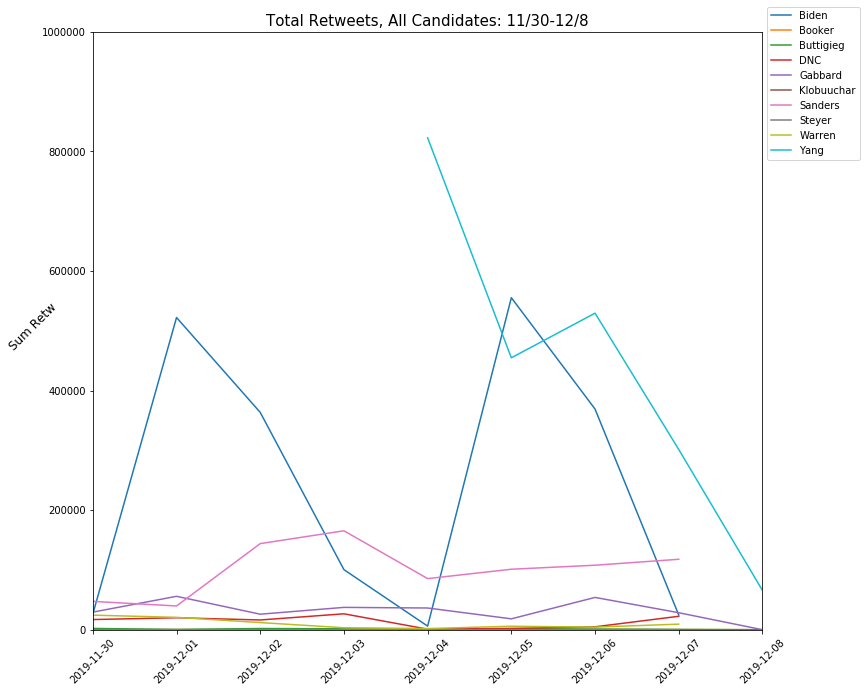

In [10]:
temp_term = ['day', 'candidate', 'retweet_count']
metric = 'sum'
print(dems['retweet_count'].describe())



temp_biden = biden[temp_term].groupby(['day']).agg(metric)
temp_booker = booker[temp_term].groupby(['day']).agg(metric)
temp_buttig = buttig[temp_term].groupby(['day']).agg(metric)
temp_dnc = dnc[temp_term].groupby(['day']).agg(metric)
temp_gabbard = gabbard[temp_term].groupby(['day']).agg(metric)
temp_klob = klob[temp_term].groupby(['day']).agg(metric)
temp_sanders = sanders[temp_term].groupby(['day']).agg(metric)
temp_steyer = steyer[temp_term].groupby(['day']).agg(metric)
temp_warren = warren[temp_term].groupby(['day']).agg(metric)
temp_yang = yang[temp_term].groupby(['day']).agg(metric)
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure()
temp_dem.plot(kind='line', legend=False, figsize=(12,11))
plt.ylim(0.0, 1e6)
plt.ylabel('Sum Retw', fontsize=12, rotation=45)
plt.xticks(rotation=45)
plt.title('Total Retweets, All Candidates: 11/30-12/8'.format(metric), fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.savefig('charts\\retweets_all.png')
plt.show()

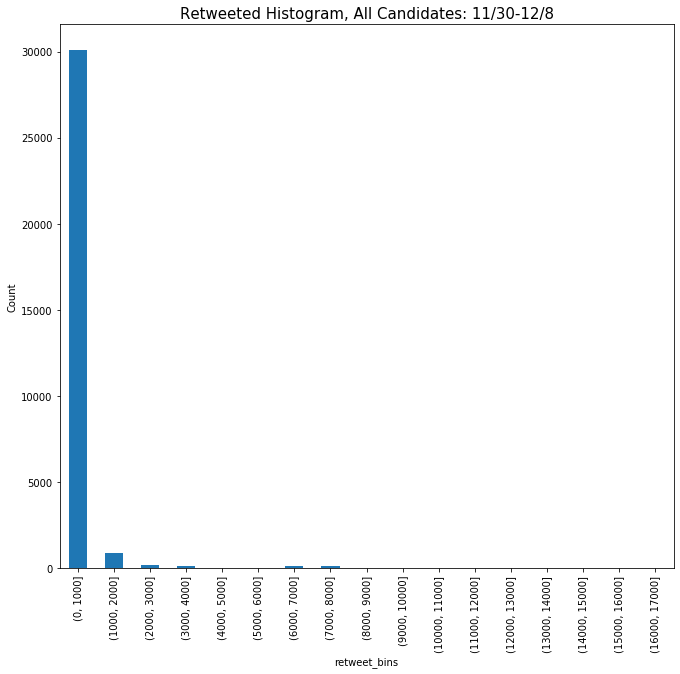

In [4]:
time0 = time()
bins = np.arange(0, 18000, 1000)
dems['retweet_bins'] = pd.cut(dems['retweet_count'], bins=bins)#, labels=labels)
dems.groupby(['retweet_bins']).size().plot(kind='bar', figsize=(11,10))
plt.title('Retweeted Histogram, All Candidates: 11/30-12/8', fontsize=15)
plt.ylabel('Count')
plt.savefig('charts\\retweeted_hist_all.png')
plt.show()

In [ ]:
dems['retweet_bins'].value_counts().iloc[:10]

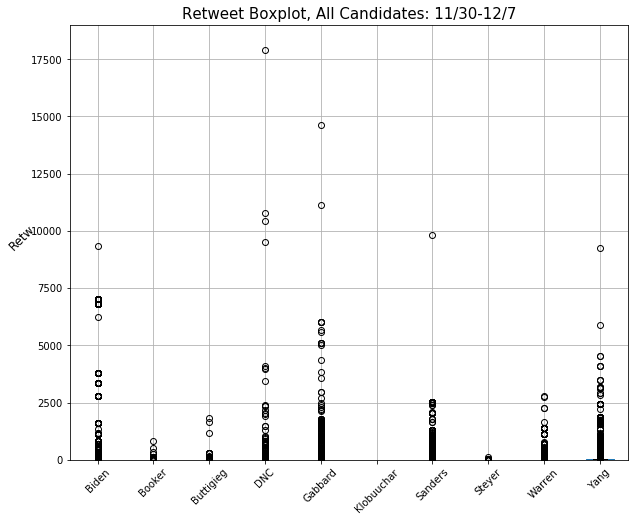

In [8]:
temp_term = ['retweet_count']

temp_biden = biden[temp_term]
temp_booker = booker[temp_term]
temp_buttig = buttig[temp_term]
temp_dnc = dnc[temp_term]
temp_gabbard = gabbard[temp_term]
temp_klob = klob[temp_term]
temp_sanders = sanders[temp_term]
temp_steyer = steyer[temp_term]
temp_warren = warren[temp_term]
temp_yang = yang[temp_term]
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure()
temp_dem.boxplot(figsize=(12,8))
plt.ylim(0.0, 1.9e4)
plt.ylabel('Retw', fontsize=12, rotation=45)
plt.xticks(rotation=45)
plt.title('Retweet Boxplot, All Candidates: 11/30-12/7'.format(metric), fontsize=15)
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.savefig('charts\\retweets_box_all.png')
plt.show()